In [ ]:
#GENDER CLASSIFICATION USING TENSORFLOW AND nltk


#Importing required libraries

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
#Importing Dataset
data = pd.read_csv("gender-classifier.csv", encoding="latin1")

### Now lets see our data.

In [ ]:
data.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,you don't know me.,3901,NaN,F5ABB5,monroevicious,NaN,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,"A global marketplace for images, videos and mu...",4122,NaN,298AAE,Shutterstock,NaN,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,The secret of getting ahead is getting started.,80,NaN,0000FF,RobinMeske,NaN,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,Pll Fan // Crazy about MCD // Ramen is bae,1825,NaN,9266CC,pigzilla_,NaN,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,"Renaissance art historian, University of Notti...",3115,NaN,9266CC,GabrieleNeher,NaN,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


Our motive is to predict the gender using data from Twitter.

We see from our data that so many columns are useless in determining gender, For Ex: _unit_id	_golden	_unit_state	_trusted_judgments	_last_judgment_at	.

**So I have decided to only use the description column for this model.**

In [ ]:
data = pd.concat([ data.description, data.gender], axis=1)
data.dropna(axis = 0, inplace = True)

In [ ]:
data.head(10)

,description,gender
0,i sing my own rhythm.,male
1,I'm the author of novels filled with family dr...,male
2,louis whining and squealing and all,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,female
5,you don't know me.,female
6,"A global marketplace for images, videos and mu...",brand
7,The secret of getting ahead is getting started.,male
8,Pll Fan // Crazy about MCD // Ramen is bae,female
9,"Renaissance art historian, University of Notti...",female


**Now lets visualise target feature: the Gender column.**

The pie chart plotted below shows that the genders also contains 'brand'
and 'unknown' values.

So we will take only the 'male' and 'female' values and convert to 0 and 1.

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

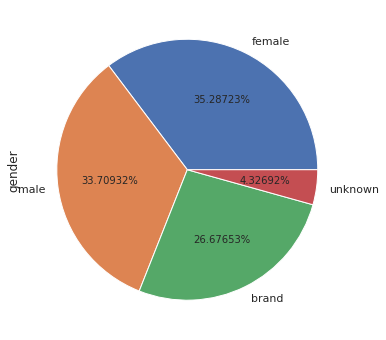

In [ ]:
data.gender.value_counts().plot(kind='pie', autopct='%0.05f%%')

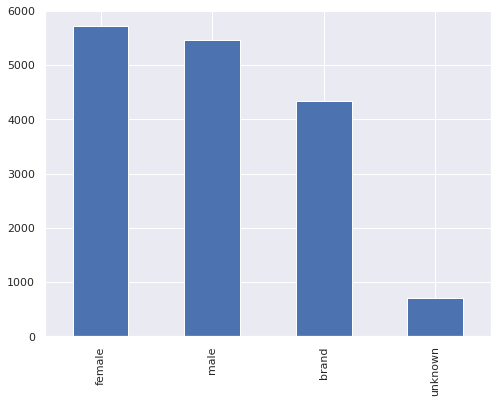

In [ ]:
data.gender.value_counts().plot.bar()

In [ ]:
# genders have two options (male/female). so i changed male to 0 and female to 1.
data.gender = [1 if gender == "female" else 0 for gender in data.gender]

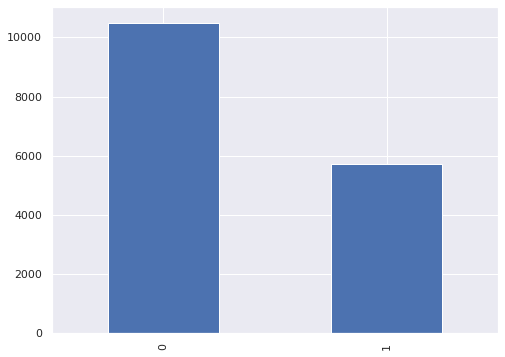

In [ ]:
data.gender.value_counts().plot.bar()

**Now we will use NLP tools for processing the description column, before we convert the text into numbers for TensorFlow
So that our Model predicts more acurately.**

In [ ]:
import nltk # natural language took kit
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk # it is the one of most comman libraries for Natural Language Process
import re # Regular Expression library

In [ ]:
import nltk
description_list = [] # we created a list so we after these steps, we will append into this list
for description in data.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    # sub method finds the given pattern ([^a-zA-Z] means, NOT letter like ":") and changes them with " " (space)
    description = description.lower()
    # we need to have all letters lowercase (because A is not equall to a)
    description = nltk.word_tokenize(description)
    # we make a word list from our text
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    # we found the roots of each words with lemma
    description = " ".join(description)
    # after all these steps,we joined the words together and remake our text.
    description_list.append(description)
    # and append these texts into the list we created.

In [ ]:
# now, we will implement "bag of words" method
from sklearn.feature_extraction.text import CountVectorizer

max_features = 5000 # we will take top 5000 feature 

cv = CountVectorizer(max_features=max_features, stop_words = "english")
# in this method, we remove the stopwords (irrelevant words) in English language. (like "of", "and", "the" etc.)

sparce_matrix = cv.fit_transform(description_list).toarray()

print("top used {} words: {}".format(max_features, cv.get_feature_names()))

top used 5000 words: ['aa', 'aaron', 'abc', 'aberdeen', 'ability', 'able', 'absolute', 'absolutely', 'absurdity', 'abuse', 'ac', 'academia', 'academic', 'academy', 'acc', 'accept', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accommodation', 'accomplish', 'account', 'accountant', 'accounting', 'ace', 'achieve', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addition', 'address', 'admin', 'administrator', 'admirer', 'adopted', 'adoption', 'adorable', 'adore', 'adult', 'advance', 'advanced', 'adventure', 'adventurer', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advocacy', 'advocate', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'affiliation', 'affordable', 'aficionado', 'afraid', 'africa', 'african', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', 'agency', 'age

In [ ]:
#converting to numerical
description = pd.get_dummies(data.description, prefix='description')
labels = pd.get_dummies(data.gender, prefix='condition')

In [ ]:
labels.head()

,condition_0,condition_1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
y = labels.values
x = pd.concat([description], axis =1)

### **Lets Start TRAINING our Model!**

First step: splitting into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

I am using 3 Dense Layers, with 1 layer being output layer.

In [ ]:
input_layer = Input(shape=(x.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15073)]           0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                226110    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 226,292
Trainable params: 226,292
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
325/325 [==============================] - 3s 8ms/step - loss: 0.6633 - acc: 0.6393 - val_loss: 0.6414 - val_acc: 0.6564
Epoch 2/50
325/325 [==============================] - 2s 7ms/step - loss: 0.5828 - acc: 0.6550 - val_loss: 0.6207 - val_acc: 0.6703
Epoch 3/50
325/325 [==============================] - 2s 7ms/step - loss: 0.1141 - acc: 0.9947 - val_loss: 0.6661 - val_acc: 0.5666
Epoch 4/50
325/325 [==============================] - 2s 6ms/step - loss: 0.0232 - acc: 0.9936 - val_loss: 0.6527 - val_acc: 0.6117
Epoch 5/50
325/325 [==============================] - 2s 6ms/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.6747 - val_acc: 0.5666
Epoch 6/50
325/325 [==============================] - 2s 6ms/step - loss: 0.0145 - acc: 0.9936 - val_loss: 0.6563 - val_acc: 0.6260
Epoch 7/50
325/325 [==============================] - 2s 7ms/step - loss: 0.0123 - acc: 0.9950 - val_loss: 0.7717 - val_acc: 0.4669
Epoch 8/50
325/325 [==============================] - 3s 10ms/step - loss: 0

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

102/102 [==============================] - 0s 3ms/step - loss: 0.6519 - acc: 0.6696
Test Score: 0.6519420146942139
Test Accuracy: 0.6696456074714661


### The Accuracy we got is **67 %**.